In [1]:
library(forecast)
library(zoo)
library(data.table)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Anexando pacote: 'zoo'


Os seguintes objetos são mascarados por 'package:base':

    as.Date, as.Date.numeric



Anexando pacote: 'data.table'


Os seguintes objetos são mascarados por 'package:zoo':

    yearmon, yearqtr




In [2]:
data = EuStockMarkets

In [3]:
head(data, 10)

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8
1991.519,1630.75,1682.9,1734.5,2487.9
1991.523,1640.17,1703.6,1757.4,2508.4
1991.527,1635.47,1697.5,1754.0,2510.5
1991.531,1645.89,1716.3,1754.3,2497.4


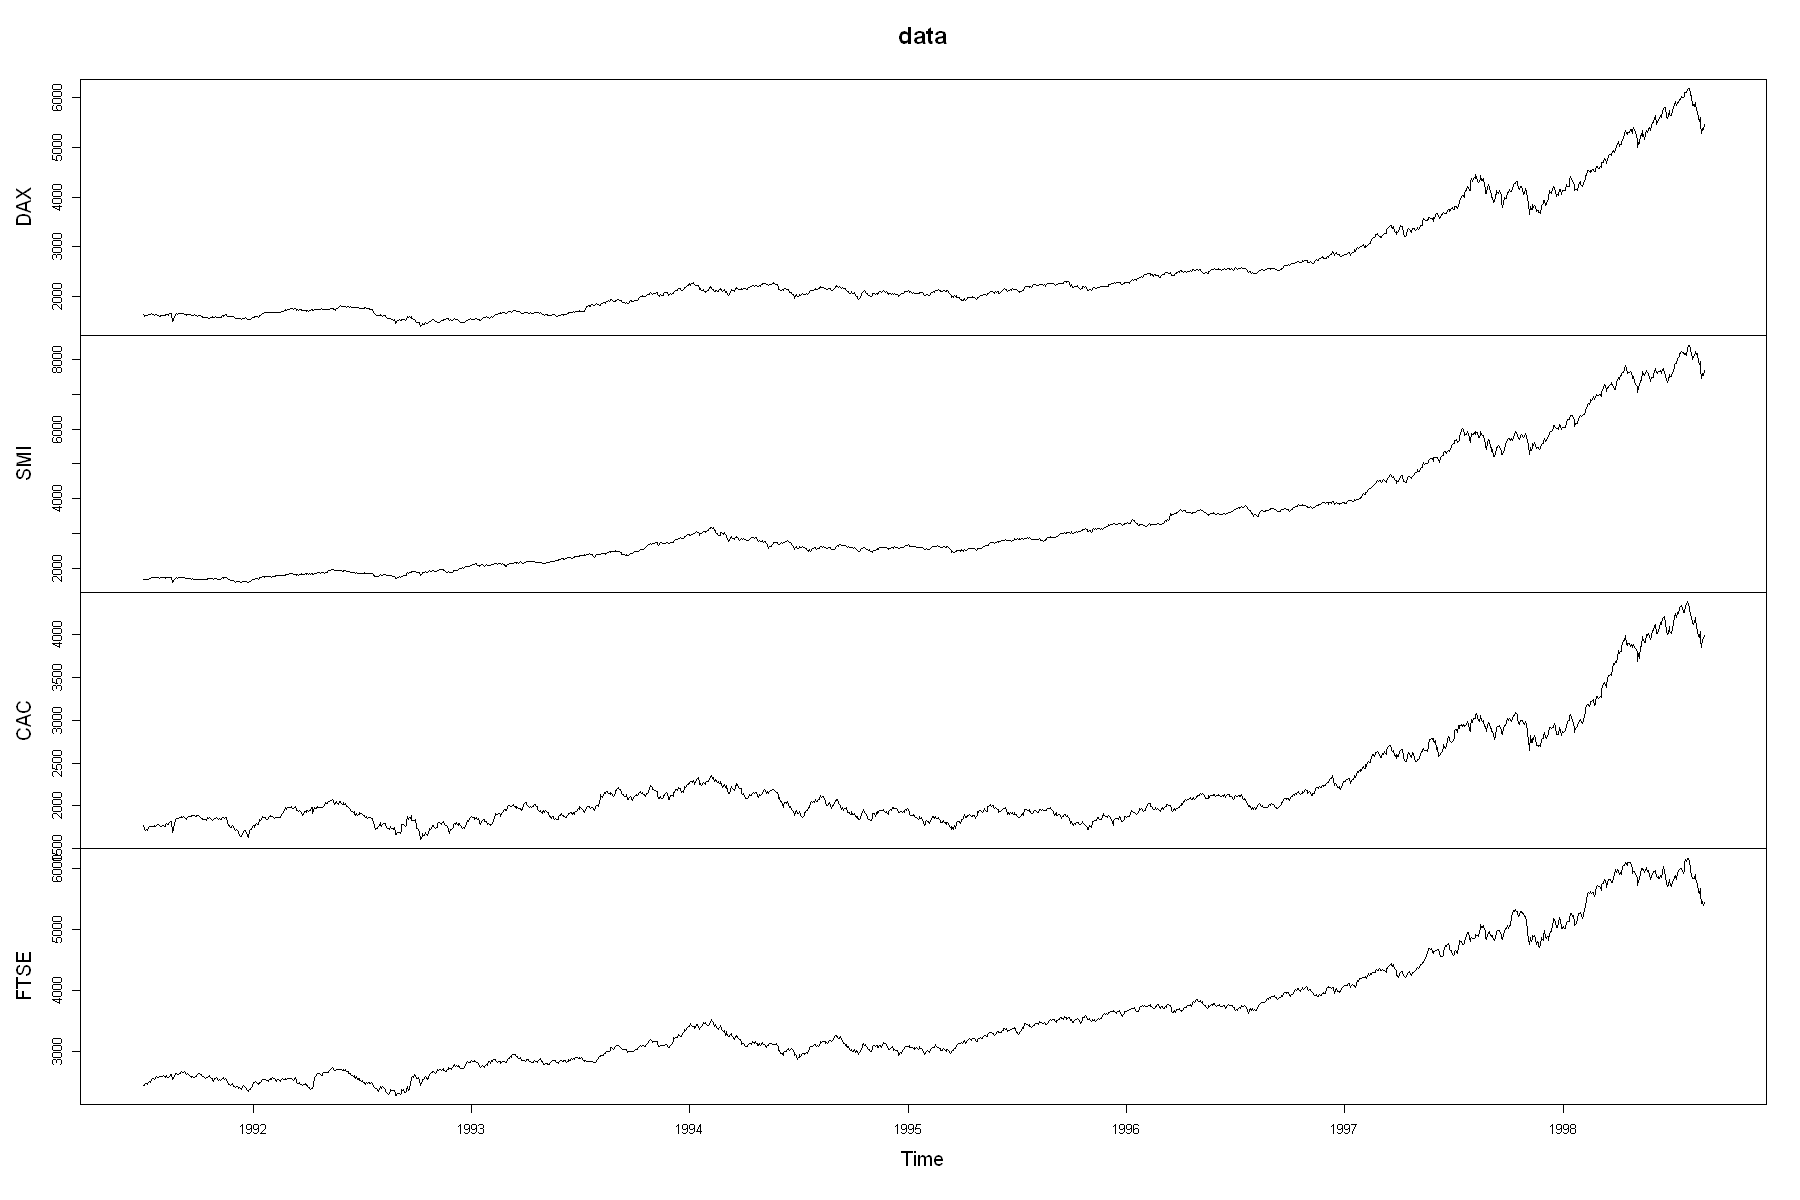

In [4]:
par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 10)

plot(data)

In [ ]:
class(data)

[1] "mts"    "ts"     "matrix" "array"

In [6]:
# frequency para descobrir a frequencia anual dos dados

frequency(data)

[1] 260

In [7]:
# start e end para encontrar o primeiro e ultimo tempo representado na série
start(data)

[1] 1991  130

In [8]:
end(data)

[1] 1998  169

In [9]:
# window para obter uma seção temporal dos dados

head( window(x = data ,start = 1997 ,end = 1998 ), n=10)

,DAX,SMI,CAC,FTSE
1997.000,2844.09,3869.8,2289.6,4092.5
1997.004,2844.09,3869.8,2289.6,4092.5
1997.008,2844.09,3869.8,2303.8,4092.5
1997.012,2859.22,3922.2,2307.0,4091.0
1997.015,2880.07,3948.3,2318.6,4115.7
1997.019,2880.07,3942.2,2315.7,4118.5
1997.023,2880.07,3942.2,2315.7,4118.5
1997.027,2820.81,3942.2,2257.0,4057.4
1997.031,2863.26,3940.1,2282.8,4089.5
1997.035,2890.20,3923.8,2306.7,4106.5


histograma

In [10]:
a = c(1, 2, 4, 4, 40)

diff(a)

[1]  1  2  0 36

In [11]:
# criando o diff

tam = length(x = a)

for (i in 1:tam){
    if (i+1 > tam) break
    else{
        print(c(diff_ = abs(a[i] - a[i+1])))
    }
}

diff_ 
    1 
diff_ 
    2 
diff_ 
    0 
diff_ 
   36 


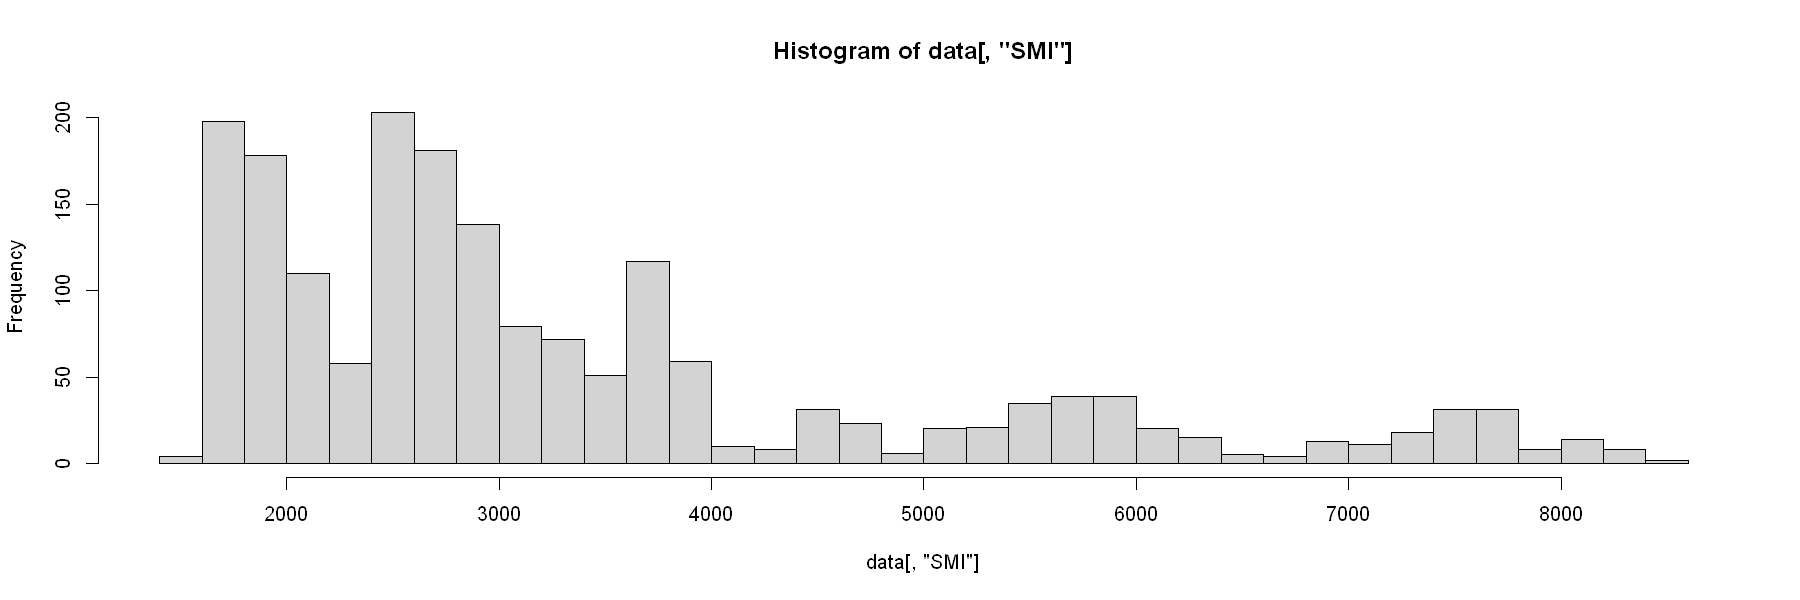

In [12]:
par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 5)

hist(x = data[, "SMI"] ,30)

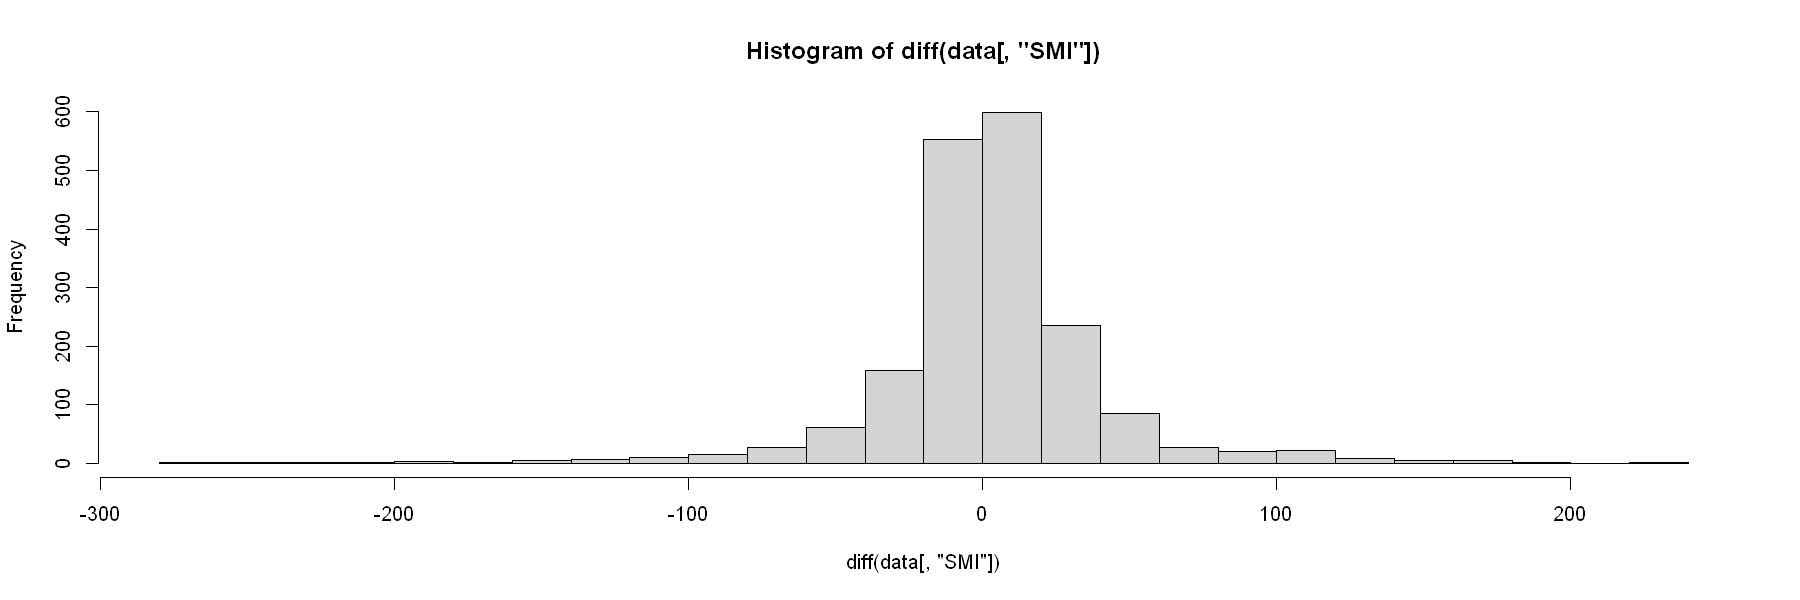

In [13]:
par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 5)
# transformado os dados para um differenciação
hist(x = diff(data[, "SMI"]) ,30)

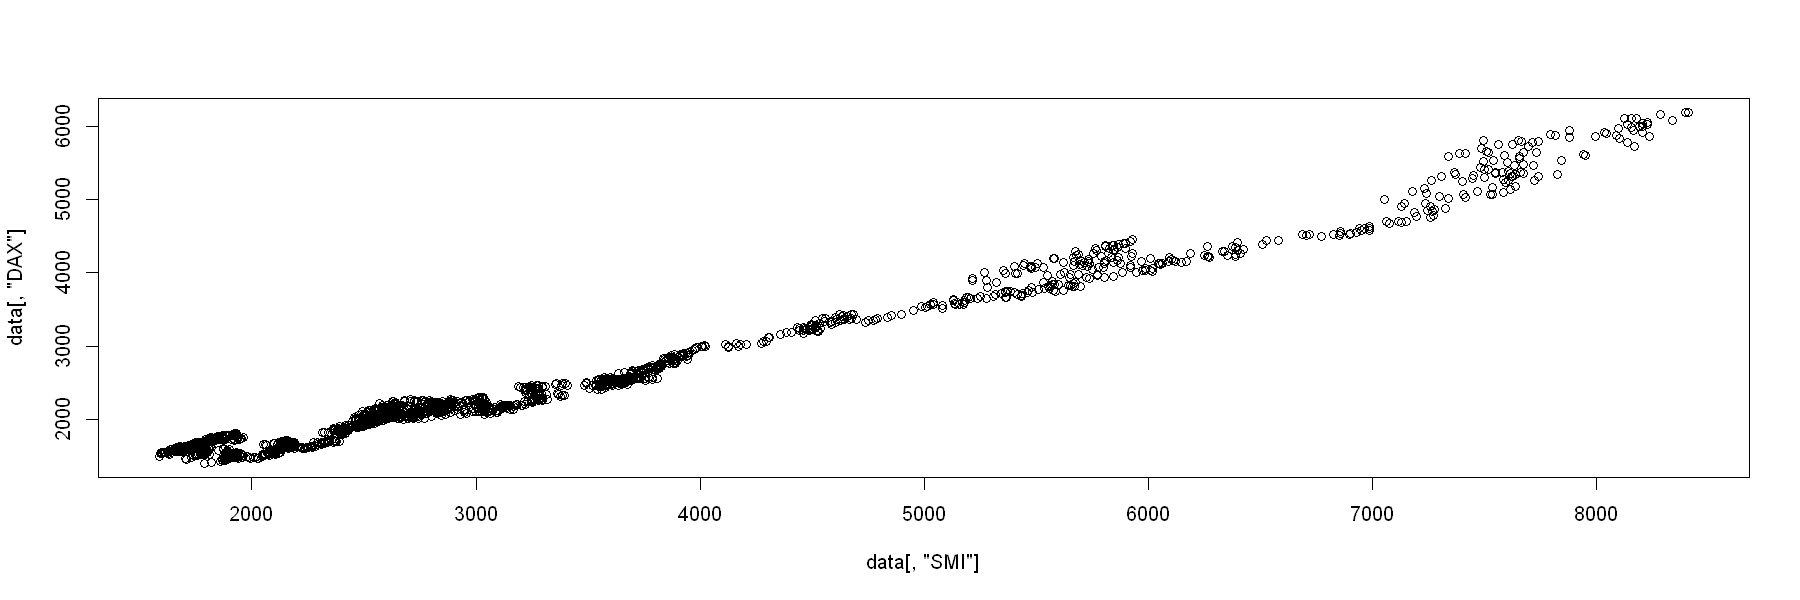

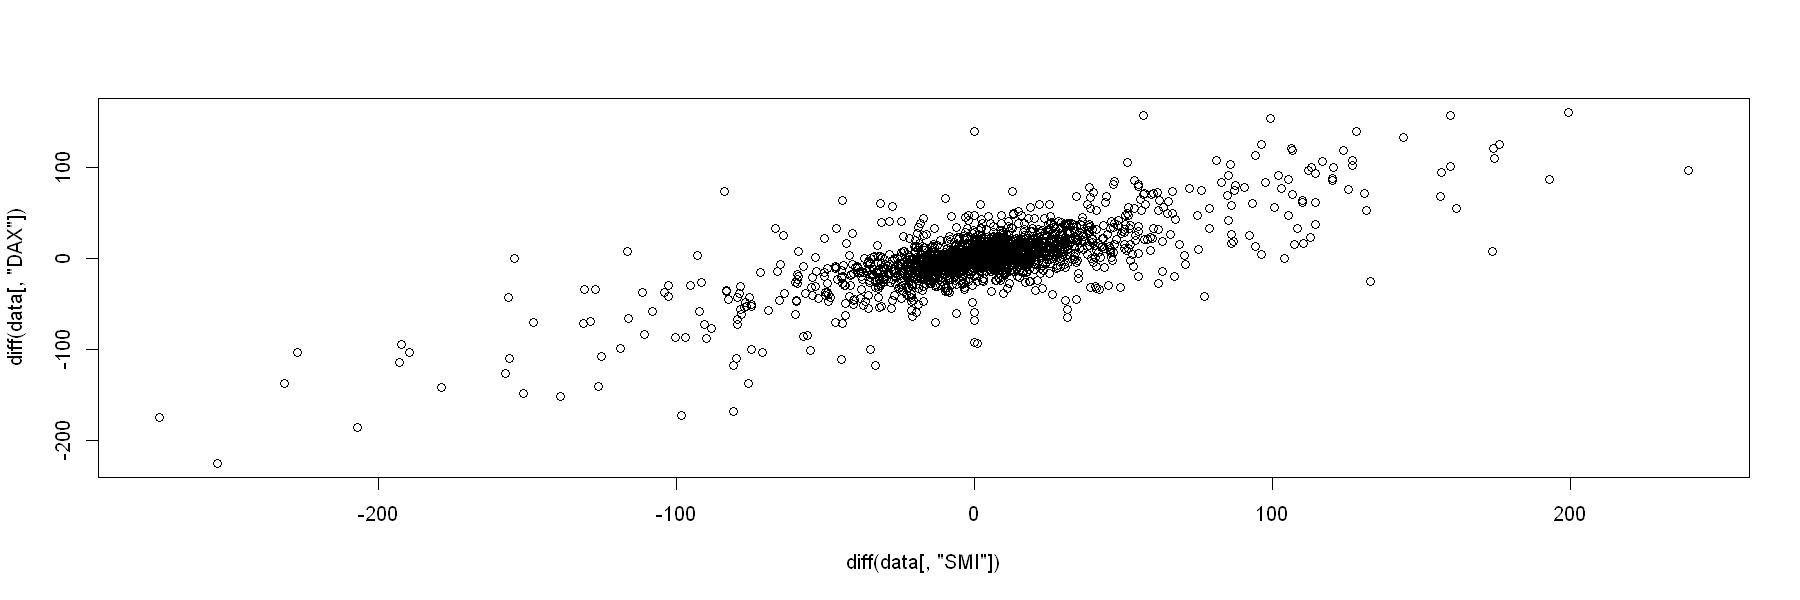

In [14]:

par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 5)

plot(data[, "SMI"], data[,"DAX"])
plot(diff(data[, "SMI"]), diff(data[,"DAX"]))


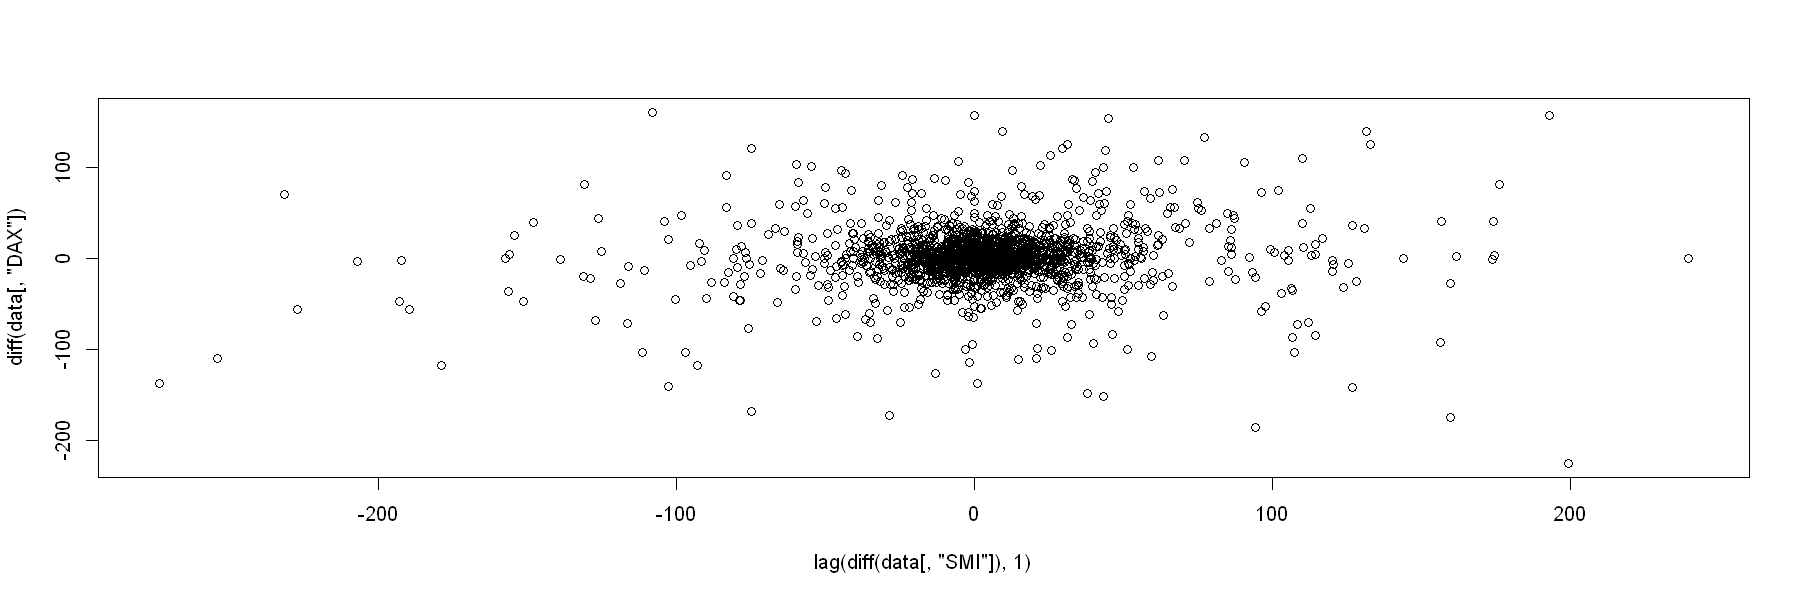

In [15]:

par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 5)


plot(lag(diff(data[, "SMI"]), 1), diff(data[,"DAX"]))


In [16]:
data('AirPassengers')

In [17]:
x = rnorm(n = 100, mean = 0, sd = 10) + 1:100
mn = function(n) rep(1/n, n)

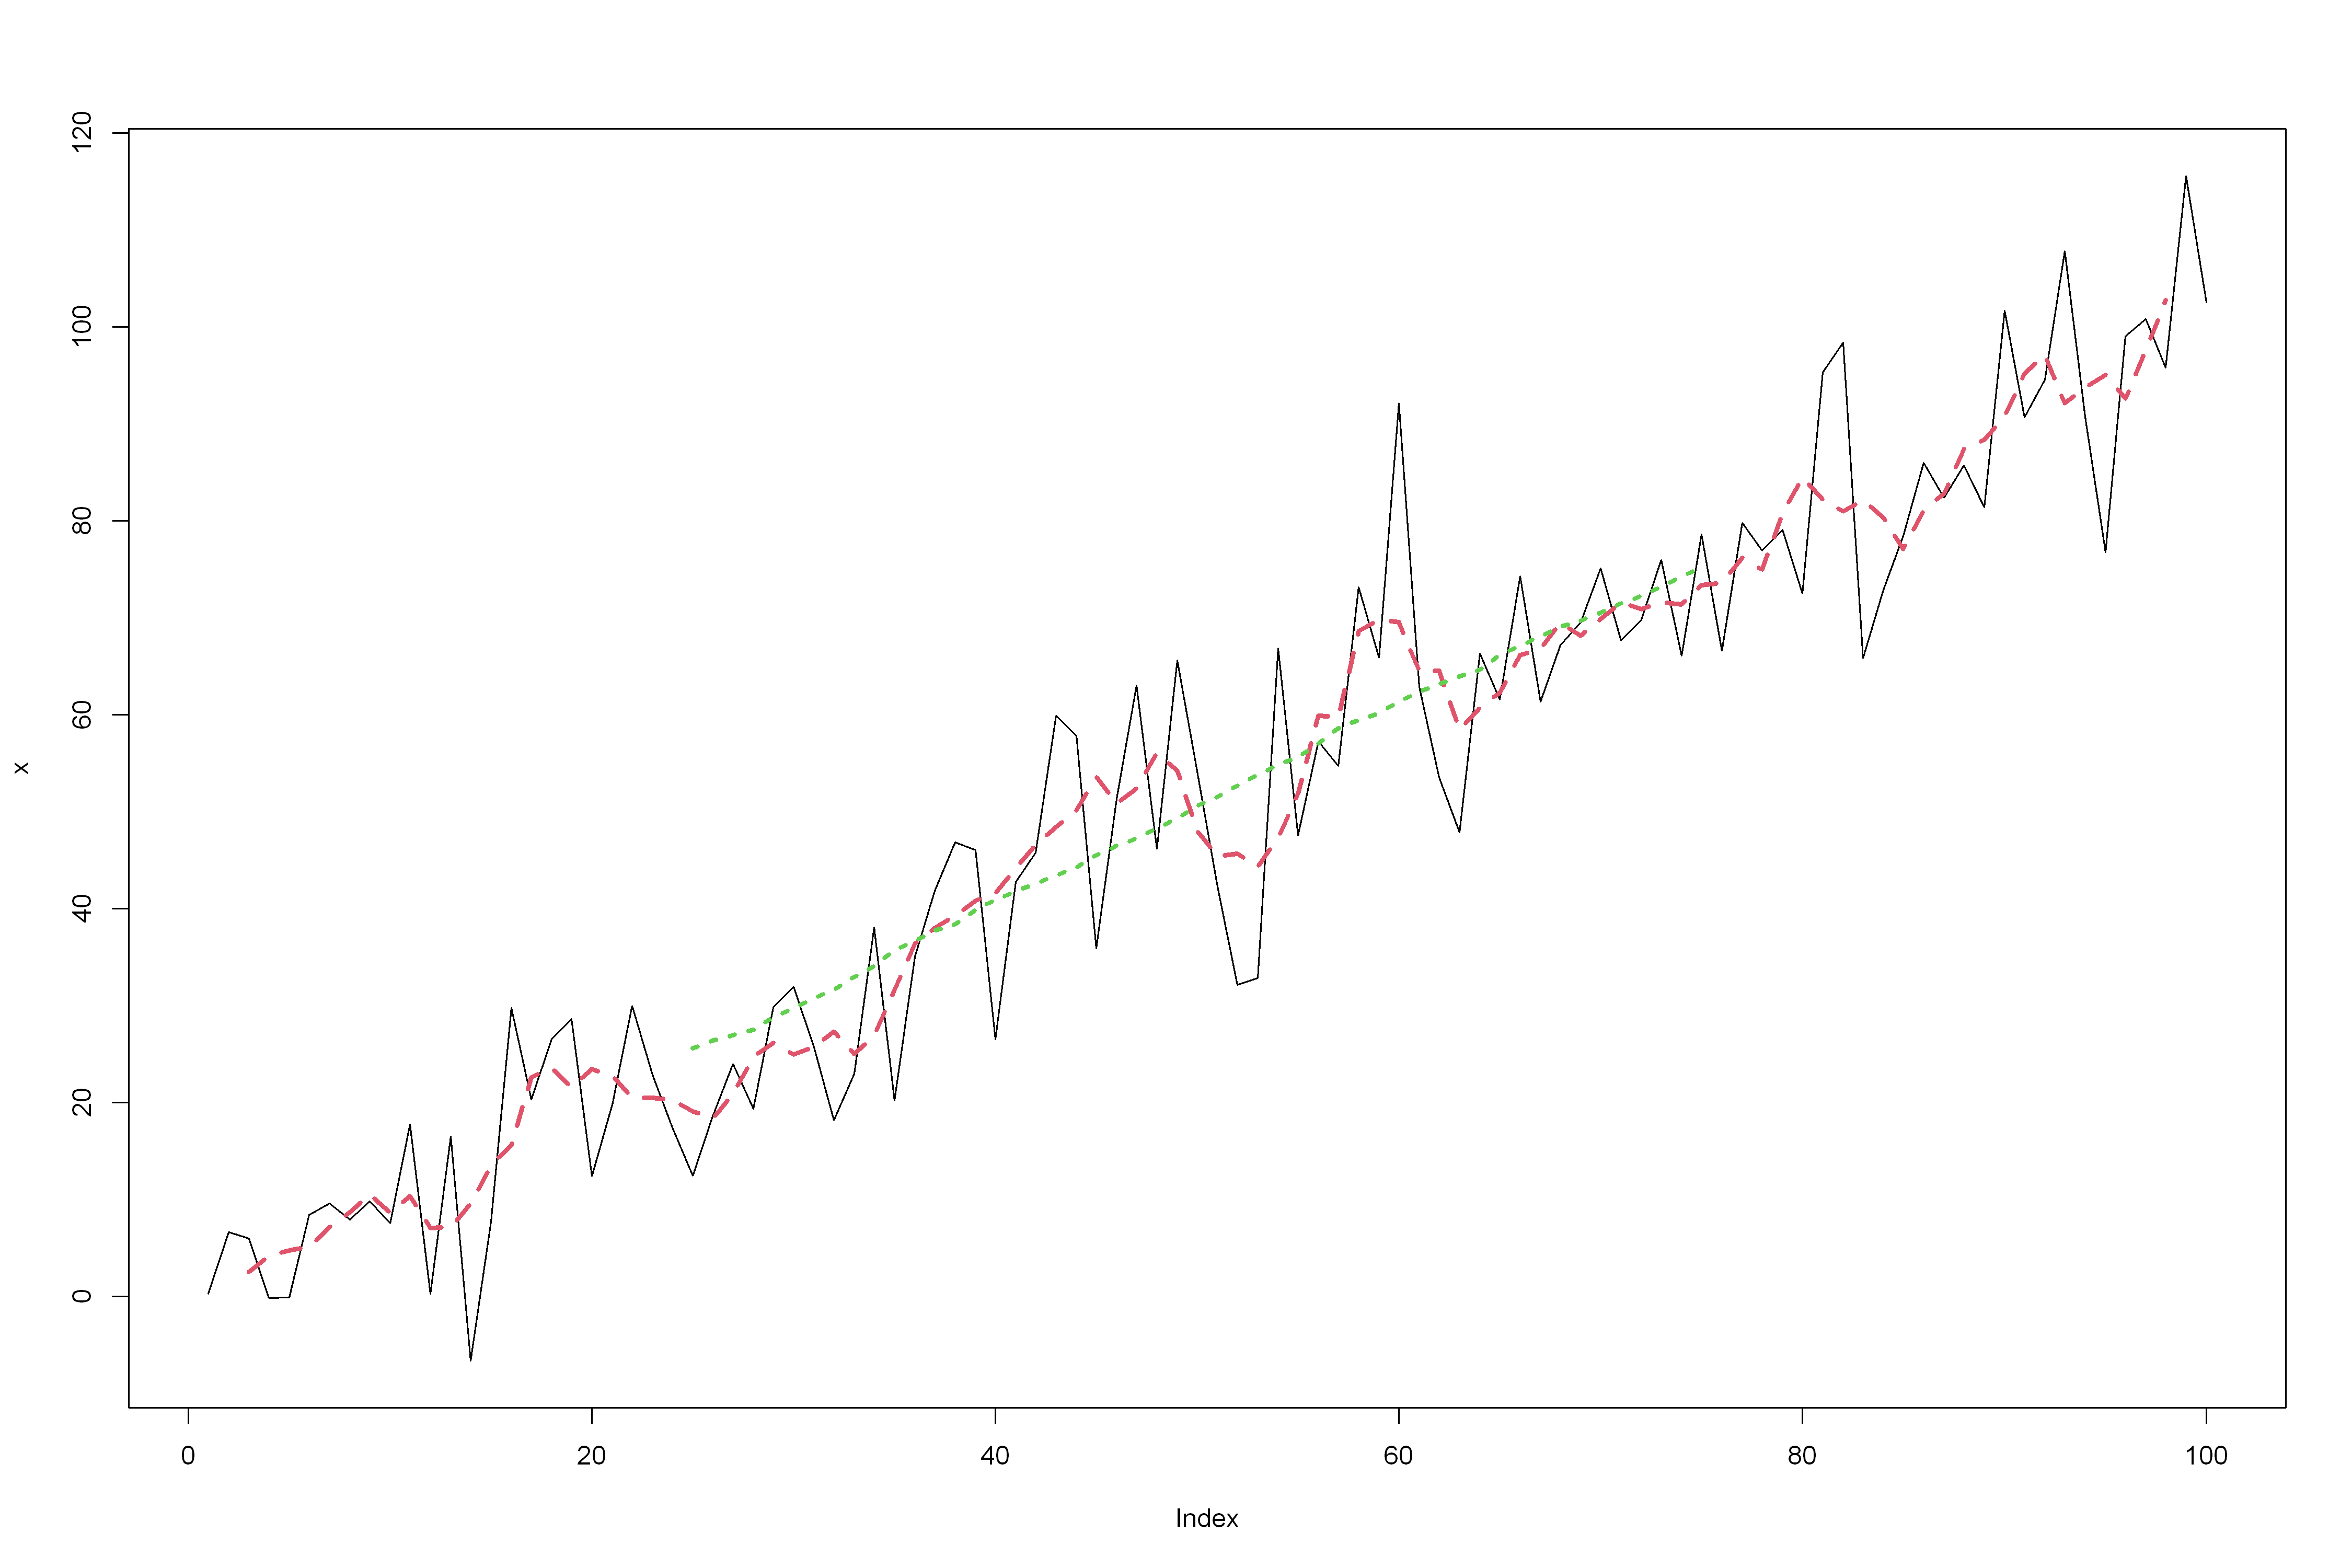

In [21]:

par(bg='white')
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res=300)
plot(x, type = 'l', lwd=1)
lines(filter(x, mn(5)), col = 2, lwd = 3, lty = 2)
lines(filter(x, mn(50)), col = 3, lwd = 3, lty = 3)


In [19]:
f1 = rollapply(
    zoo(x), 20, function(w) min(w), align="left", partial=TRUE
)
f2 = rollapply(
    zoo(x), 20, function(w) min(w), align="right", partial=TRUE
)

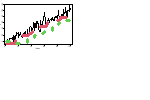

In [20]:

par(bg='white', mfrow = c(2, 2))
options(repr.plot.width = 15, repr.plot.height = 10)

plot(x, type = 'l', lwd=1)
lines(f1, col = 2, lwd = 3, lty = 2)
lines(f2, col = 3, lwd = 3, lty = 3)
